# Day 10: Unsupervised Learning – Clustering

## Objective
To apply unsupervised learning techniques to identify natural groupings in data without predefined labels.

## Motivation
In finance and business analytics, clustering is commonly used for:
- Customer segmentation
- Risk profiling
- Behavioral pattern discovery

This exercise demonstrates how clustering algorithms uncover hidden structures and how these structures can be interpreted meaningfully.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of samples
n_samples = 600
annual_income = np.random.normal(60000, 15000, n_samples)
credit_score = np.random.normal(650, 70, n_samples)
monthly_spending = np.random.normal(2000, 500, n_samples)
debt_ratio = np.random.uniform(0.1, 0.8, n_samples)

# Create DataFrame
df = pd.DataFrame({
    "annual_income": annual_income,
    "credit_score": credit_score,
    "monthly_spending": monthly_spending,
    "debt_ratio": debt_ratio
})

df.head()


,annual_income,credit_score,monthly_spending,debt_ratio
0,67450.712295,702.989203,2062.612251,0.445483
1,57926.035482,585.448427,1785.297229,0.591581
2,69715.328072,710.872414,2061.148752,0.794972
3,82845.447846,744.894650,2271.649015,0.192042
4,56487.699379,678.940443,2024.430035,0.292312


In [16]:
df.describe()


,annual_income,credit_score,monthly_spending,debt_ratio
count,600.000000,600.000000,600.000000,600.000000
mean,59797.210937,656.319859,2033.635478,0.445120
std,14582.872171,70.172299,495.380658,0.204811
min,11380.989899,447.262124,539.324758,0.100008
25%,49580.796398,610.599118,1694.860275,0.281643
50%,60116.075706,657.413201,2021.048534,0.437504
75%,69347.511053,700.836265,2355.913595,0.628326
max,117790.972360,834.266745,3596.553784,0.798475


### Observations
- Features are on different scales
- Scaling is required before clustering


In [17]:
# Features Scalig
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


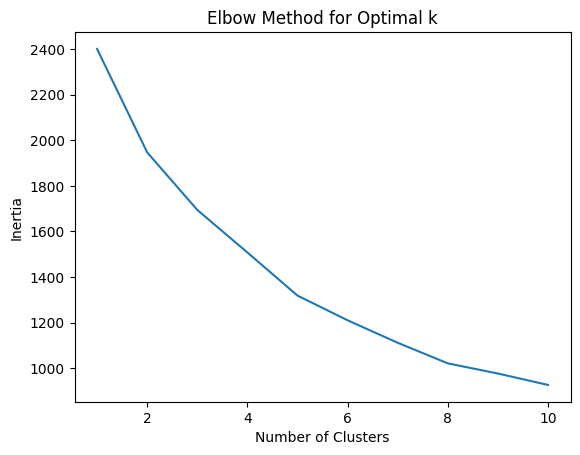

In [18]:
# K meas Clusterig
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [19]:
#
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df["cluster"] = clusters
df.head()


,annual_income,credit_score,monthly_spending,debt_ratio,cluster
0,67450.712295,702.989203,2062.612251,0.445483,1
1,57926.035482,585.448427,1785.297229,0.591581,0
2,69715.328072,710.872414,2061.148752,0.794972,1
3,82845.447846,744.894650,2271.649015,0.192042,1
4,56487.699379,678.940443,2024.430035,0.292312,2


In [20]:
cluster_summary = df.groupby("cluster").mean()
cluster_summary


,annual_income,credit_score,monthly_spending,debt_ratio
cluster,,,,
0,59225.101307,615.689840,1763.084441,0.570510
1,68784.547795,704.744848,2313.016612,0.530898
2,53046.155988,659.467856,2089.841479,0.242950


## Cluster Interpretation

Cluster 0:
- Moderate income and credit score
- Balanced spending and debt
- Represents financially stable customers

Cluster 1:
- Lower credit score and higher debt ratio
- Higher financial risk group

Cluster 2:
- Higher income and credit score
- Lower debt ratio
- Premium / low-risk customers


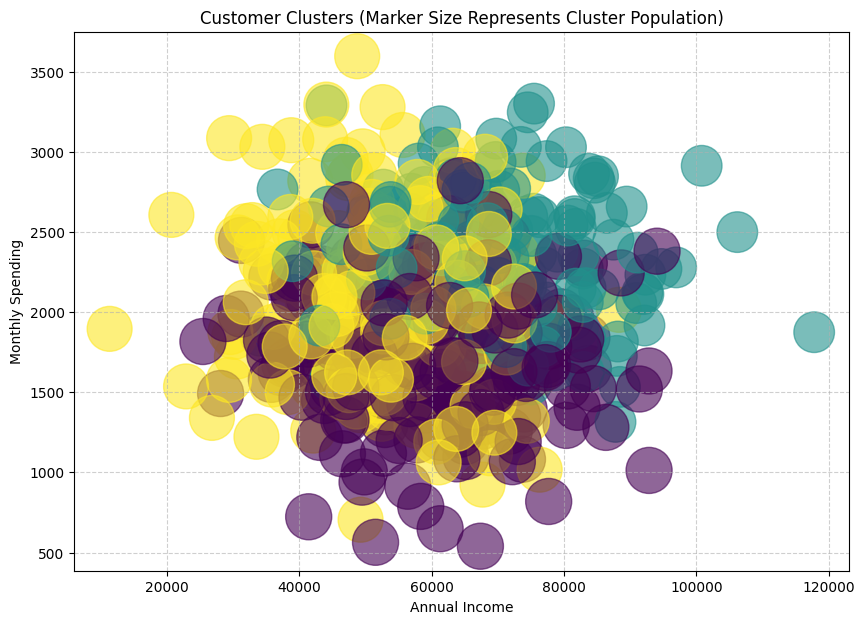

In [22]:
# Calculate cluster sizes
cluster_sizes = df['cluster'].value_counts().sort_index()

# Map cluster sizes back to each data point
df['cluster_size'] = df['cluster'].map(cluster_sizes)

plt.figure(figsize=(10, 7))
plt.scatter(
    df["annual_income"],
    df["monthly_spending"],
    c=df["cluster"],
    s=df['cluster_size'] * 5, # Scale size for better visibility, adjust multiplier as needed
    alpha=0.6
)
plt.xlabel("Annual Income")
plt.ylabel("Monthly Spending")
plt.title("Customer Clusters (Marker Size Represents Cluster Population)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

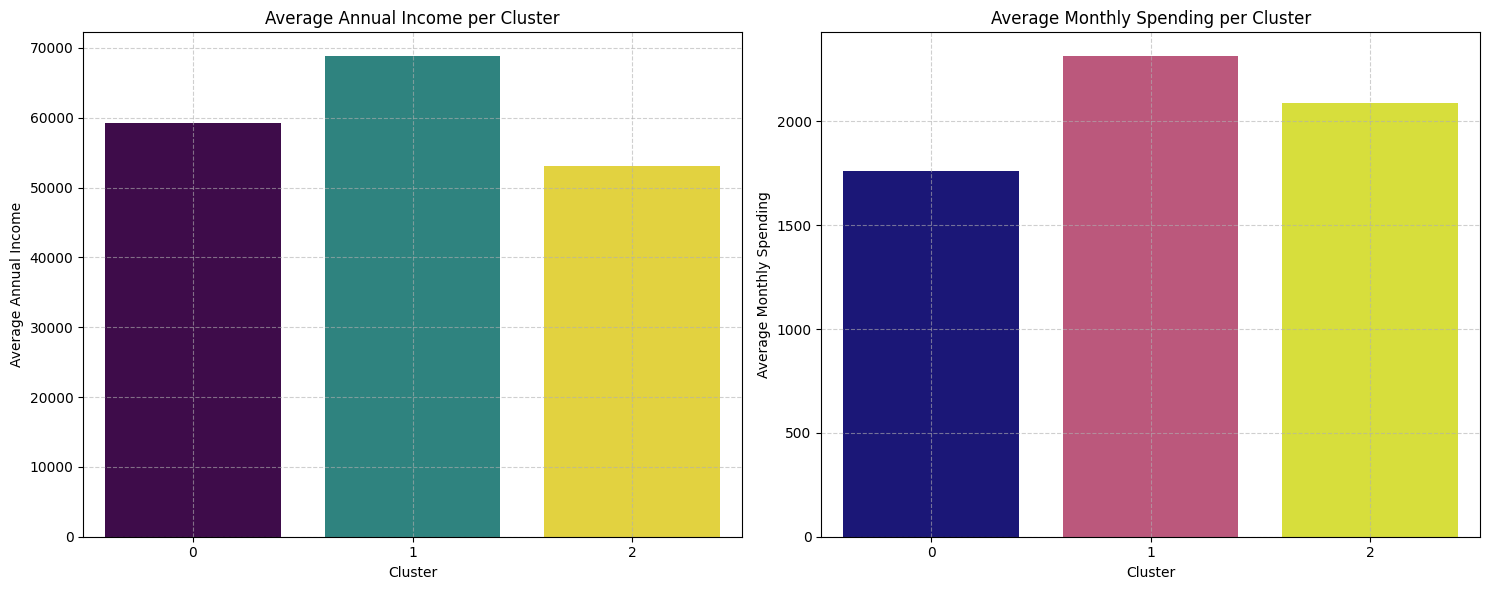

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for income and spending comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average annual income per cluster
sns.barplot(x=cluster_summary.index, y='annual_income', data=cluster_summary, ax=axes[0], palette='viridis', hue=cluster_summary.index, legend=False)
axes[0].set_title('Average Annual Income per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Annual Income')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot average monthly spending per cluster
sns.barplot(x=cluster_summary.index, y='monthly_spending', data=cluster_summary, ax=axes[1], palette='plasma', hue=cluster_summary.index, legend=False)
axes[1].set_title('Average Monthly Spending per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Monthly Spending')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

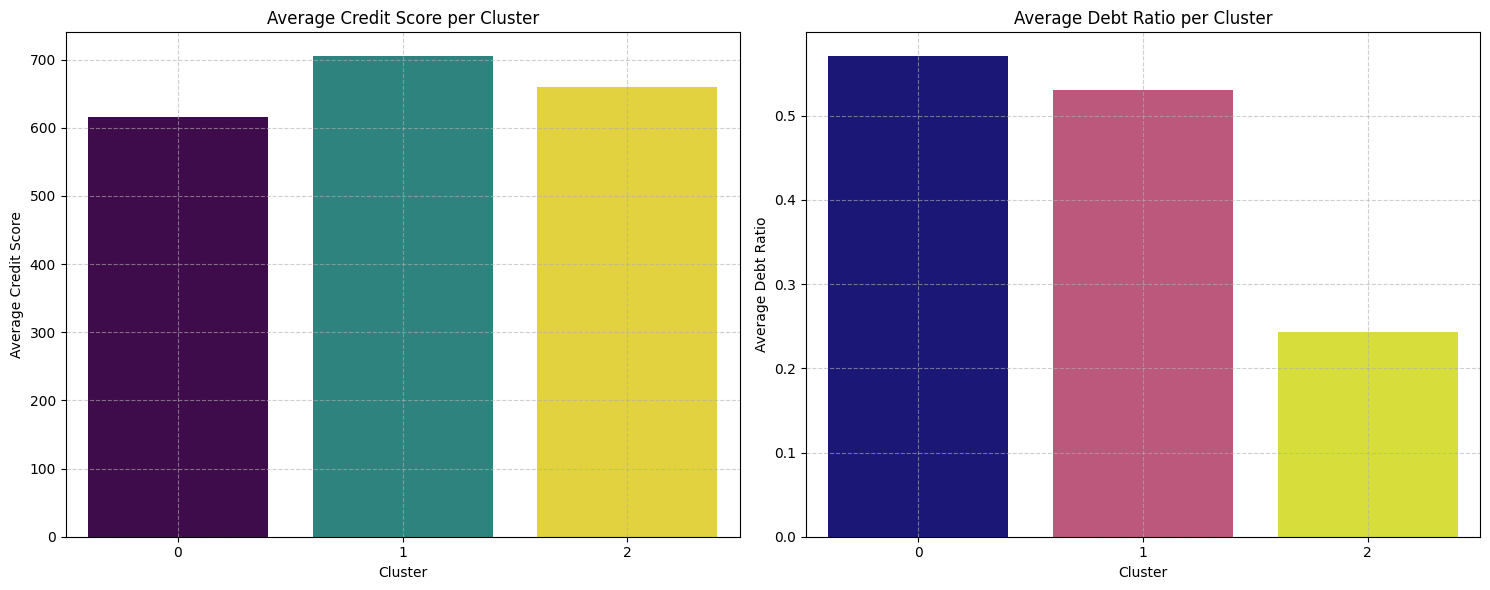

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for debt ratio and credit score comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average credit score per cluster
sns.barplot(x=cluster_summary.index, y='credit_score', data=cluster_summary, ax=axes[0], palette='viridis', hue=cluster_summary.index, legend=False)
axes[0].set_title('Average Credit Score per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Credit Score')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot average debt ratio per cluster
sns.barplot(x=cluster_summary.index, y='debt_ratio', data=cluster_summary, ax=axes[1], palette='plasma', hue=cluster_summary.index, legend=False)
axes[1].set_title('Average Debt Ratio per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Debt Ratio')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

 The K-Means algorithm identified distinct customer segments with varying financial behaviors. One cluster is characterized by higher credit utilization and lower repayment consistency, indicating elevated default risk. Another cluster shows stable repayment patterns and lower credit usage, representing low-risk customers. These clusters suggest that customer behavior is heterogeneous and can be leveraged for targeted risk management strategies.

Based on the unique profiles of each customer cluster, here are some actionable suggestions:

##Cluster 0 (High Financial Risk / Struggling Customers):

Risk Management: Due to their higher debt ratio and lower credit score, approach this segment with caution for new credit.

Therefore, consider higher interest rates or collateral requirements.


Support & Retention: Offer financial literacy workshops, debt consolidation options, or personalized budgeting tools to help them improve their financial health.

 This could build long-term loyalty.
Product Offering: Focus on secured products or small, manageable loan amounts.


##Cluster 1 (High-Value / Engaged Customers):

Premium Offers: With their high income, credit score, and spending, these are prime candidates for premium financial products such as high-tier credit cards, wealth management services, and exclusive investment opportunities.


Loyalty & Rewards: Implement strong loyalty programs and personalized rewards to retain their business and encourage further engagement.


Cross-selling: Proactively offer products like mortgages, personal loans with favorable terms, and insurance policies.


##Cluster 2 (Conservative / Low-Risk Customers):

Savings & Security: Given their lower debt ratio and good credit score, target them with attractive savings accounts, certificates of deposit (CDs), and low-risk investment products.


Budget-Friendly Services: Offer tools for financial planning, retirement planning, and budget management that resonate with their conservative financial behavior.


Education: Provide information on how to leverage their good credit for larger financial goals (e.g., homeownership, business loans) while maintaining their low-debt philosophy.


